# **Importación de los datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# URL del archivo CSV en GitHub
train = 'https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/train.csv'
test = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/test_augmented.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


La seleccion de los valores de test se utilizaron en base a los valores correctos obtenidos del repositorio de Github obtenidos a traves de Kaggle: https://www.kaggle.com/datasets/wesleyhowe/titanic-labelled-test-set, fue consultado con el profe ivan, debido a que se obtiene un 100% de accuracy al subirlo en Kaggle

In [ ]:
df_train = pd.read_csv(train)
df_test = test

# **Limpieza y trasnformacion de los datos**

## Renombrar columnas

In [ ]:
# Renombrar columnas a español
df_train = df_train.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


df_test = df_test.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


In [ ]:
print(df_train.info())
print('')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                891 non-null    int64  
 1   Sobrevivio        891 non-null    int64  
 2   Clase Ticket      891 non-null    int64  
 3   Nombre            891 non-null    object 
 4   Sexo              891 non-null    object 
 5   Edad              714 non-null    float64
 6   Hermanos_Esposos  891 non-null    int64  
 7   Padres_Hijos      891 non-null    int64  
 8   Boleto            891 non-null    object 
 9   Tarifa            891 non-null    float64
 10  Cabina            204 non-null    object 
 11  Embarcacion       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------     

## Cantidad de nulos

In [ ]:
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                    0
Sobrevivio            0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                177
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                0
Cabina              687
Embarcacion           2
dtype: int64

ID                    0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                 86
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                1
Cabina              327
Embarcacion           0
Sobrevivio            0
dtype: int64


Hay bastantes valores nulos en las columnas de Cabina y Edad y unos pocos en las columnas de Embarcación y Tarifa.

## Eliminar columnas no necesarias

In [ ]:
# Descartar las columnas 'Boleto' y 'Cabina'
df_train = df_train.drop(columns=['Boleto', 'Cabina'])

df_test = df_test.drop(columns=['Boleto', 'Cabina'])

Visualizando los datos las columnas Boleto y Cabina no parecen ser de ayuda para definir la supervivencia del pasajero por lo que se eliminaron las columnas

# Clasificacion de los grupos de edad para la imputacion sintetica de datos por medio del titulo

## Extracción del título del nombre

Ahora se realiza una imputación de datos en Edad dado que hay valores nulos y la columna puede ser importante. Para ello, la columna Nombre puede ser importante por los títulos de Mr, Mrs, Master, Miss. Por lo que primero se creará la columna de Titulo a partir de la columna Nombre

In [ ]:
# Extraer los títulos de la columna 'Nombre'
df_train['Titulo'] = df_train.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)

# Ver todos los títulos únicos en el dataframe de entrenamiento
titulos_unicos_train = df_train['Titulo'].unique()
print("Títulos únicos en df_train:", titulos_unicos_train)

# Hacer lo mismo para el dataframe de prueba, si es necesario
df_test['Titulo'] = df_test.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)
titulos_unicos_test = df_test['Titulo'].unique()
print("Títulos únicos en df_test:", titulos_unicos_test)


# Para el dataframe de entrenamiento
df_train['Titulo'] = df_train.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Titulo'] = df_train['Titulo'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otro')
df_train['Titulo'] = df_train['Titulo'].replace('Mlle', 'Miss')
df_train['Titulo'] = df_train['Titulo'].replace('Ms', 'Miss')
df_train['Titulo'] = df_train['Titulo'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Otro": 5}
df_train['Titulo'] = df_train['Titulo'].map(title_mapping)
df_train['Titulo'] = df_train['Titulo'].fillna(0)

# Para el dataframe de prueba
df_test['Titulo'] = df_test.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Titulo'] = df_test['Titulo'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otro')
df_test['Titulo'] = df_test['Titulo'].replace('Mlle', 'Miss')
df_test['Titulo'] = df_test['Titulo'].replace('Ms', 'Miss')
df_test['Titulo'] = df_test['Titulo'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Otro": 5}
df_test['Titulo'] = df_test['Titulo'].map(title_mapping)
df_test['Titulo'] = df_test['Titulo'].fillna(0)

Títulos únicos en df_train: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Títulos únicos en df_test: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


## Observación de las medias y desviaciones estándar de los cuatro principales títulos

In [ ]:
# Filtrar los registros para cada categoría
mr_df = df_train[df_train['Titulo'] == 1]
mrs_df = df_train[df_train['Titulo'] == 3]
master_df = df_train[df_train['Titulo'] == 4]
miss_df = df_train[df_train['Titulo'] == 2]
otro_df =df_train[df_train['Titulo'] == 5]

# Calcular la media y desviación estándar para cada categoría
mr_mean = mr_df['Edad'].mean()
mr_std = mr_df['Edad'].std()

mrs_mean = mrs_df['Edad'].mean()
mrs_std = mrs_df['Edad'].std()

master_mean = master_df['Edad'].mean()
master_std = master_df['Edad'].std()

miss_mean = miss_df['Edad'].mean()
miss_std = miss_df['Edad'].std()

otro_mean = otro_df['Edad'].mean()
otro_std = otro_df['Edad'].std()

# Imprimir los resultados
print(f"Mr: Media = {mr_mean}, Desviación Estándar = {mr_std}")
print(f"Mrs: Media = {mrs_mean}, Desviación Estándar = {mrs_std}")
print(f"Master: Media = {master_mean}, Desviación Estándar = {master_std}")
print(f"Miss: Media = {miss_mean}, Desviación Estándar = {miss_std}")
print(f"Otro: Media = {otro_mean}, Desviación Estándar = {otro_std}")


Mr: Media = 32.368090452261306, Desviación Estándar = 12.708792722573982
Mrs: Media = 35.788990825688074, Desviación Estándar = 11.437489845771985
Master: Media = 4.574166666666667, Desviación Estándar = 3.6198716433439615
Miss: Media = 21.845637583892618, Desviación Estándar = 12.870541648556465
Otro: Media = 45.54545454545455, Desviación Estándar = 11.782663910642995


Vemos que hay distintas edades según sea Mr, Mrs, Master, Miss y Otro a partir de ahí se utilizarán los promedios y desviaciones estándar según una distribución normal para asignar probabilísticamente hablando las edades en valores nulos

In [ ]:
import numpy as np

# Calcular la media y desviación estándar para cada categoría
categories = [1, 2, 3, 4, 5]
stats = {}

for category in categories:
    category_df = df_train[df_train['Titulo'] == category]
    mean_age = category_df['Edad'].mean()
    std_age = category_df['Edad'].std()
    stats[category] = (mean_age, std_age)

# Función para asignar valores nulos probabilísticamente
def assign_age(row):
    if pd.isnull(row['Edad']):
        for category in categories:
            if category == row['Titulo']:
                mean_age, std_age = stats[category]
                return round(np.random.normal(mean_age, std_age))
    return row['Edad']

# Asignar los valores nulos en la columna 'Edad'
df_train['Edad'] = df_train.apply(assign_age, axis=1)

df_test['Edad'] = df_test.apply(assign_age, axis=1)

print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Embarcacion         2
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              1
Embarcacion         0
Sobrevivio          0
Titulo              0
dtype: int64


Antes teníamos 177 y 86 datos nulos en la columna de Edad en los dataframes train y test respectivamente. Ahora solamente quedan valores nulos en las columnas de Tarifa y Embarcación

Para imputar los valores de la Tarifa, primero se agrupan por la variable 'Clase Ticket' la cual está relacionada con la variable de la Tarifa y como el dato faltante corresponde a un pasajero de la Tercera Clase se toma la media y desviación estándar de la Tarifa para los de Tercera Clase y probabilísticamente se imputa el dato

In [ ]:
rng = np.random.RandomState(22)
clase_3_tarifa = df_test[df_test['Clase Ticket'] == 3]['Tarifa']
mean_tarifa_3 = clase_3_tarifa.mean()
std_tarifa_3 = clase_3_tarifa.std()
df_test.at[152, 'Tarifa'] =  round(rng.normal(mean_tarifa_3, std_tarifa_3))
df_test.iloc[152]

,152
ID,1044
Clase Ticket,3
Nombre,"Storey, Mr. Thomas"
Sexo,male
Edad,60.5
Hermanos_Esposos,0
Padres_Hijos,0
Tarifa,11.0
Embarcacion,S
Sobrevivio,0


Ahora para rellenar los valores de Embarcacion se utilizó la moda en dicha columna al ser una columna categórica

In [ ]:
# Encuentra el valor más frecuente en la columna 'Embarcacion'
most_frequent_value = df_train['Embarcacion'].mode()[0]

# Rellena los valores nulos con el valor más frecuente
df_train['Embarcacion'].fillna(most_frequent_value, inplace=True)

In [ ]:
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Embarcacion         0
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Embarcacion         0
Sobrevivio          0
Titulo              0
dtype: int64


Como se puede observar, ya no quedan valores nulos en las columnas que pueden ser de interpes para nuestros modelos

## Creación de las columnas de Clasificacion_Edad, Familiares y Solo_Viaje

Para apoyarnos en la visualización de datos se creará una columna llamada 'Clasificacion_Edad' que va a tener las categorías de 'Bebé', 'Niño', 'Adolescente', 'Adulto', 'Adulto mayor', 'Viejo' según la edad de la persona

In [ ]:
# Crear una columna de clasificación de edad
bins = bins=[0, 5, 14, 18, 30, 60, 100]
labels = ['Bebé', 'Niño', 'Adolescente', 'Adulto', 'Adulto mayor', 'Viejo']

df_train['Clasificacion_Edad'] = pd.cut(df_train['Edad'], bins=bins, labels=labels, right=False)

df_test['Clasificacion_Edad'] = pd.cut(df_test['Edad'], bins=bins, labels=labels, right=False)

Para un mejor interpretación de los datos se creará la columna de Familiares que será la suma de las columnas Hermanos/Esposos + Padres/Hijos + 1

También se creará la columna de Solo_Viaje que tendrá valores binarios de 0 y 1 para determinar si el pasajero va solo o no dentro del Titanic según la columna de Familiares

In [ ]:
df_train['Familiares'] = df_train['Hermanos_Esposos'] + df_train['Padres_Hijos'] + 1
df_test['Familiares'] = df_test['Hermanos_Esposos'] + df_test['Padres_Hijos'] + 1

df_train['Solo_Viaje'] = (df_train['Familiares'] == 1).astype(int)
df_test['Solo_Viaje'] = (df_test['Familiares'] == 1).astype(int)



## Datos atípicos

Se crea un conjunto de gráficos de caja (boxplots) para comparar la distribución de varias columnas numéricas los datos de entrenamiento en función de la columna Sobrevivio.

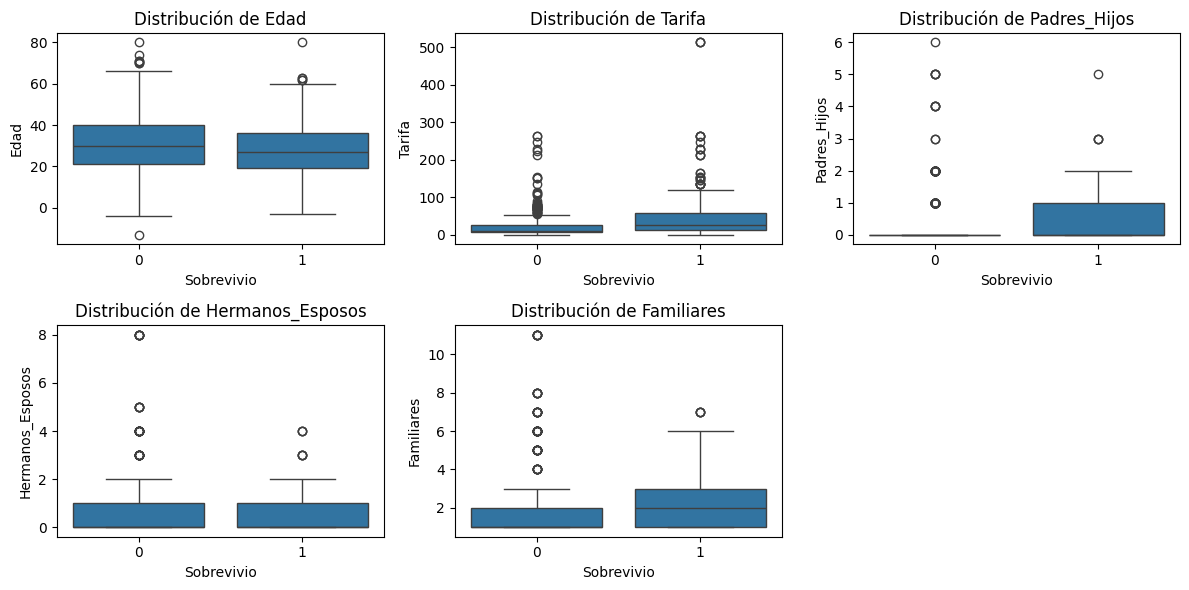

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_train es tu DataFrame y tienes varias columnas numéricas
columnas = ['Edad', 'Tarifa', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']  # Sustituye por las columnas que quieras comparar
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas) // n_cols + (len(columnas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Si solo hay una fila o una columna, axes será un array 1D, necesitamos asegurarnos de que es 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un boxplot para cada columna en un subgráfico diferente
for i, columna in enumerate(columnas):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='Sobrevivio', y=columna, data=df_train, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {columna}')

# Eliminar ejes vacíos si la cantidad de columnas no es múltiplo de n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



**Observaciones**


*   Edad: La edad no parece ser un factor determinante significativo en la supervivencia, ya que las medianas son similares.

*   Tarifa: Las tarifas más altas parecen estar asociadas con una mayor probabilidad de supervivencia.

*   Padres_Hijos y Familiares: Tener padres/hijos y un mayor número de familiares a bordo parece estar ligeramente asociado con una mayor probabilidad de supervivencia.

*   Hermanos_Esposos: No hay una diferencia significativa entre sobrevivientes y no sobrevivientes en términos del número de hermanos y esposos a bordo.


# **Visualización de datos**

 Se busca analizar la tasa de supervivencia en función de varias variables categóricas en los datos de entrenamiento, visualizándolas mediante gráficos de barras (barplots).

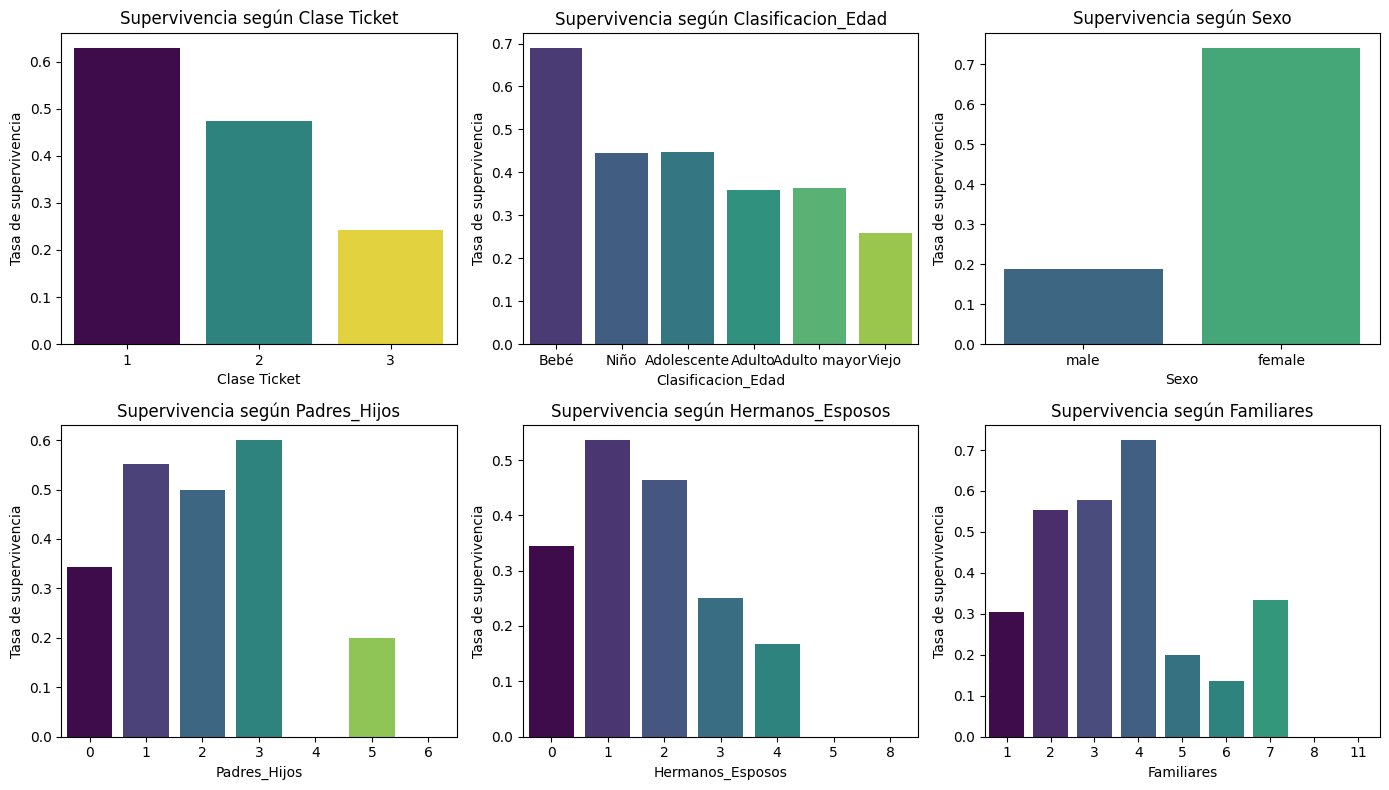

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_train es tu DataFrame y quieres analizar otras variables categóricas similares a 'Clase Ticket'
columnas_categoricas = ['Clase Ticket', 'Clasificacion_Edad', 'Sexo', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']  # Sustituye con las columnas categóricas que quieras analizar
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas_categoricas) // n_cols + (len(columnas_categoricas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Asegurarse de que axes es un array 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un barplot para cada variable categórica en un subgráfico diferente
for i, columna in enumerate(columnas_categoricas):
    row = i // n_cols
    col = i % n_cols

    # Calcular la tasa de supervivencia para cada categoría
    sobrevivencia_por_categoria = df_train.groupby(columna, observed=False)['Sobrevivio'].mean()
    #print(f"Tasa de sobrevivencia por {columna}:")
    #print(sobrevivencia_por_categoria)
    #print("\n")

    # Crear el gráfico de barras
    sns.barplot(x=columna, y='Sobrevivio', data=df_train, errorbar=None, hue=columna, palette='viridis', legend=False, ax=axes[row, col])
    axes[row, col].set_title(f'Supervivencia según {columna}')
    axes[row, col].set_ylabel('Tasa de supervivencia')
    axes[row, col].set_xlabel(columna)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


**Observaciones**

*   Clase del Ticket: La clase del ticket es un factor importante, con los pasajeros de primera clase teniendo mayores tasas de supervivencia.

*   Clasificación de Edad: Los más jóvenes, especialmente los bebés, tienen mayores probabilidades de supervivencia.

*   Sexo: Las mujeres tienen una tasa de supervivencia significativamente mayor que los hombres.

*   Padres/Hijos y Hermanos/Esposos: Tener una cantidad moderada de familiares a bordo (ni demasiados ni ninguno) parece estar asociado con una mayor supervivencia.

Se crea un boxplot que muestre la distribución de la columna Tarifa según las diferentes categorías de la columna Clase Ticket de los datos de entrenamiento.

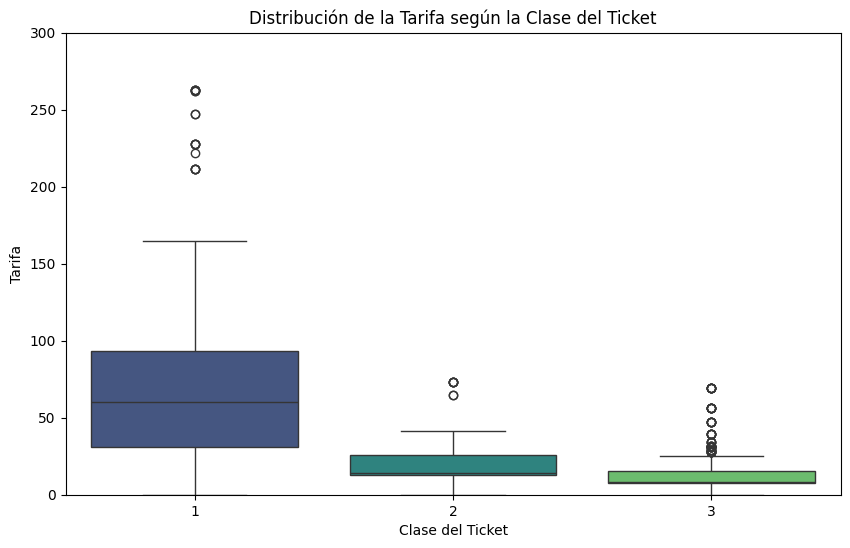

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Clase Ticket', y='Tarifa', data=df_train, palette='viridis', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Clase del Ticket')
ax.set_ylabel('Tarifa')
ax.set_title('Distribución de la Tarifa según la Clase del Ticket')

# Limitar el rango del eje y a un máximo de 300
ax.set_ylim(0, 300)

# Mostrar la figura
plt.show()


**Observaciones**

*   Primera Clase: Los pasajeros de primera clase pagaron significativamente más por sus tickets en comparación con los pasajeros de segunda y tercera clase. La distribución de las tarifas es amplia y presenta varios valores atípicos altos.

*   Segunda Clase: Las tarifas de segunda clase son más bajas y están más concentradas en un rango estrecho, con menos valores atípicos comparados con la primera clase.

*   Tercera Clase: Las tarifas de tercera clase son las más bajas y tienen una distribución estrecha similar a la de la segunda clase, pero con una mediana más baja y también con algunos valores atípicos.

# Preprocesamiento de datos previo modelo

## Variables categóricas en columnas binarias con One Hot Encoding

Para poder utilizar las variables categóricas dentro de cada uno de los modelos a usar de Machine Learning de convertirán las columnas categóricas a varias columnas desglosadas con valores de 0 y 1 aplicando la práctica de One Hot Encoding

In [ ]:
# Clase Ticket
df_train['Primera Clase'] = 0
df_train['Segunda Clase'] = 0
df_train['Tercera Clase'] = 0
df_train.loc[df_train['Clase Ticket'] == 1, 'Primera Clase'] = 1
df_train.loc[df_train['Clase Ticket'] == 2, 'Segunda Clase'] = 1
df_train.loc[df_train['Clase Ticket'] == 3, 'Tercera Clase'] = 1

df_test['Primera Clase'] = 0
df_test['Segunda Clase'] = 0
df_test['Tercera Clase'] = 0
df_test.loc[df_test['Clase Ticket'] == 1, 'Primera Clase'] = 1
df_test.loc[df_test['Clase Ticket'] == 2, 'Segunda Clase'] = 1
df_test.loc[df_test['Clase Ticket'] == 3, 'Segunda Clase'] = 1

# Embarcacion
df_train['S'] = 0
df_train['Q'] = 0
df_train['C'] = 0
df_train.loc[df_train['Embarcacion'] == 'S', 'S'] = 1
df_train.loc[df_train['Embarcacion'] == 'Q', 'Q'] = 1
df_train.loc[df_train['Embarcacion'] == 'C', 'C'] = 1

df_test['S'] = 0
df_test['Q'] = 0
df_test['C'] = 0
df_test.loc[df_test['Embarcacion'] == 'S', 'S'] = 1
df_test.loc[df_test['Embarcacion'] == 'Q', 'Q'] = 1
df_test.loc[df_test['Embarcacion'] == 'C', 'C'] = 1

# Familias
df_train['FamPequeña'] = 0
df_train['FamMediana'] = 0
df_train['FamGrande'] = 0
df_train.loc[df_train['Familiares'] < 3, 'FamPequeña'] = 1
df_train.loc[((df_train['Familiares'] == 3) | (df_train['Familiares'] == 4)), 'FamMediana'] = 1
df_train.loc[df_train['Familiares'] > 4, 'FamGrande'] = 1

df_test['FamPequeña'] = 0
df_test['FamMediana'] = 0
df_test['FamGrande'] = 0
df_test.loc[df_test['Familiares'] < 3, 'FamPequeña'] = 1
df_test.loc[((df_test['Familiares'] == 3) | (df_train['Familiares'] == 4)), 'FamMediana'] = 1
df_test.loc[df_test['Familiares'] > 4, 'FamGrande'] = 1

# Titulo
df_train['Mr'] = 0
df_train['Miss'] = 0
df_train['Mrs'] = 0
df_train['Master'] = 0
df_train['Otro'] = 0
df_train.loc[df_train['Titulo'] == 1, 'Mr'] = 1
df_train.loc[df_train['Titulo'] == 2, 'Miss'] = 1
df_train.loc[df_train['Titulo'] == 3, 'Mrs'] = 1
df_train.loc[df_train['Titulo'] == 4, 'Master'] = 1
df_train.loc[df_train['Titulo'] == 5, 'Otro'] = 1

df_test['Mr'] = 0
df_test['Miss'] = 0
df_test['Mrs'] = 0
df_test['Master'] = 0
df_test['Otro'] = 0
df_test.loc[df_test['Titulo'] == 1, 'Mr'] = 1
df_test.loc[df_test['Titulo'] == 2, 'Miss'] = 1
df_test.loc[df_test['Titulo'] == 3, 'Mrs'] = 1
df_test.loc[df_test['Titulo'] == 4, 'Master'] = 1
df_test.loc[df_test['Titulo'] == 5, 'Otro'] = 1

# Sexo
df_train['Femenino'] = 0
df_train['Masculino'] = 0
df_train.loc[df_train['Sexo'] == 'female', 'Femenino'] = 1
df_train.loc[df_train['Sexo'] == 'male', 'Masculino'] = 1

df_test['Femenino'] = 0
df_test['Masculino'] = 0
df_test.loc[df_test['Sexo'] == 'female', 'Femenino'] = 1
df_test.loc[df_test['Sexo'] == 'male', 'Masculino'] = 1

df_train.head()

,ID,Sobrevivio,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Embarcacion,...,FamPequeña,FamMediana,FamGrande,Mr,Miss,Mrs,Master,Otro,Femenino,Masculino
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,...,1,0,0,0,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,...,1,0,0,0,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,...,1,0,0,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,...,1,0,0,1,0,0,0,0,0,1


Así fue la creación de las nuevas columnas binarias:

**Clase Ticket**
* Primera Clase
* Segunda Clase
* Tercera Clase

**Embarcacion**
* S
* Q
* C

**Familiares**
* FamPequeña
* FamMediana
* FamGrande

**Titulo**
* Mr
* Miss
* Mrs
* Master
* Otro

**Sexo**
* Femenino
* Masculino

## Escalamiento de los datos

Debido a que la mayoría de los datos tienen valores de 0 y 1 al ser columnas binarias. Se escalarán los datos numéricos dentro del intervalo [0,1] usando el escalamiento MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Escalar los valores de la columna
df_train['Edad_Escalada'] = scaler.fit_transform(df_train[['Edad']])
df_train['Hermanos_Esposos_Escalada'] = scaler.fit_transform(df_train[['Hermanos_Esposos']])
df_train['Padres_Hijos_Escalada'] = scaler.fit_transform(df_train[['Padres_Hijos']])
df_train['Tarifa_Escalada'] = scaler.fit_transform(df_train[['Tarifa']])

df_test['Edad_Escalada'] = scaler.fit_transform(df_test[['Edad']])
df_test['Hermanos_Esposos_Escalada'] = scaler.fit_transform(df_test[['Hermanos_Esposos']])
df_test['Padres_Hijos_Escalada'] = scaler.fit_transform(df_test[['Padres_Hijos']])
df_test['Tarifa_Escalada'] = scaler.fit_transform(df_test[['Tarifa']])



Se escalaron los datos numéricos dentro de un intervalo de 0 y 1

# Componentes Principales

Debido que se tienen muchas columnas para procesar dentro de los modelos, se aplicará un Análisis de Componentes Principales o PCA para reducir la dimensionalidad de los datos sin perder la varianza explicada

In [ ]:
print(df_train.columns)

Index(['ID', 'Sobrevivio', 'Clase Ticket', 'Nombre', 'Sexo', 'Edad',
       'Hermanos_Esposos', 'Padres_Hijos', 'Tarifa', 'Embarcacion', 'Titulo',
       'Clasificacion_Edad', 'Familiares', 'Solo_Viaje', 'Primera Clase',
       'Segunda Clase', 'Tercera Clase', 'S', 'Q', 'C', 'FamPequeña',
       'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro',
       'Femenino', 'Masculino', 'Edad_Escalada', 'Hermanos_Esposos_Escalada',
       'Padres_Hijos_Escalada', 'Tarifa_Escalada'],
      dtype='object')


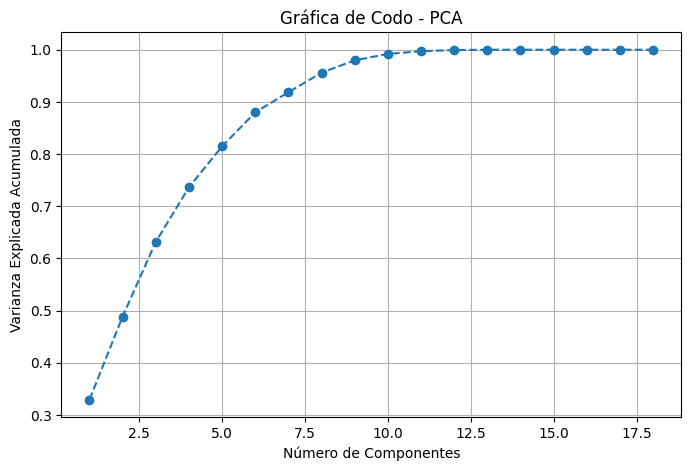

In [ ]:
from sklearn.decomposition import PCA

# Seleccionar las columnas que deseas analizar
X_scaled = df_train[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_

# Graficar la gráfica de codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Gráfica de Codo - PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()


Se utilizarán 6 componentes principales ya que esto explica casi el 90% de variabilidad de los datos

A continuación se crearán las columnas de PC1, PC2, PC3, PC4, PC5, PC6 a partir de las ecuaciones encontradas

In [ ]:
X = df_train[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]

X_train_scaled = df_train[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]
X_test_scaled = df_test[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]

# Aplicar PCA
pca = PCA(n_components=6)
pca.fit(X_scaled)

# Imprimir la expresión y coeficientes de los primeros 3 componentes principales
for i in range(6):
    coeficientes = pca.components_[i]
    expresion = " + ".join(f"{coef:.3f}*{col}" for coef, col in zip(coeficientes, X.columns))
    print(f"PC{i+1} = {expresion}")

# Crear las columnas PC1, PC2 y PC3 en el DataFrame
df_train[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = pca.transform(X_train_scaled)
df_test[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = pca.transform(X_test_scaled)


PC1 = 0.087*Primera Clase + 0.051*Segunda Clase + -0.137*Tercera Clase + 0.513*Femenino + -0.513*Masculino + -0.026*Edad_Escalada + -0.091*S + 0.022*Q + 0.069*C + -0.146*FamPequeña + 0.103*FamMediana + 0.042*FamGrande + -0.510*Mr + 0.309*Miss + 0.200*Mrs + -0.002*Master + 0.003*Otro + 0.028*Tarifa_Escalada
PC2 = 0.513*Primera Clase + 0.182*Segunda Clase + -0.695*Tercera Clase + -0.075*Femenino + 0.075*Masculino + 0.104*Edad_Escalada + -0.168*S + -0.109*Q + 0.277*C + 0.155*FamPequeña + -0.024*FamMediana + -0.131*FamGrande + 0.082*Mr + -0.142*Miss + 0.060*Mrs + -0.049*Master + 0.049*Otro + 0.068*Tarifa_Escalada
PC3 = -0.118*Primera Clase + 0.423*Segunda Clase + -0.304*Tercera Clase + -0.014*Femenino + 0.014*Masculino + 0.007*Edad_Escalada + 0.624*S + -0.187*Q + -0.438*C + -0.204*FamPequeña + 0.167*FamMediana + 0.037*FamGrande + -0.039*Mr + -0.114*Miss + 0.101*Mrs + 0.042*Master + 0.009*Otro + -0.015*Tarifa_Escalada
PC4 = 0.029*Primera Clase + -0.049*Segunda Clase + 0.020*Tercera Clase + 

# **Entrenamiento del modelo**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Paso 1: Seleccionar las características (predictoras) y la variable objetivo para el DataFrame de entrenamiento
predictoras = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
X_train = df_train[predictoras]
y_train = df_train['Sobrevivio']

# Si ya tienes un DataFrame de prueba separado, no necesitas dividirlo. Solo selecciona las características:
X_test = df_test[predictoras]
y_test = df_test['Sobrevivio']

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "Recall on train:": recall_score(fitted_model.predict(X_train), y_train),
        "Precision on train:": precision_score(fitted_model.predict(X_train), y_train),
        "F1-Score on train:": f1_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1]),

        "Accuracy on test:": accuracy_score(fitted_model.predict(X_test), y_test),
        "Recall on test:": recall_score(fitted_model.predict(X_test), y_test),
        "Precision on test:": precision_score(fitted_model.predict(X_test), y_test),
        "F1-Score on test:": f1_score(fitted_model.predict(X_test), y_test),
        "ROC AUC on test:": roc_auc_score(y_test, fitted_model.predict_proba(X_test)[:, 1]),
    }

    # Imprimir solo las métricas de prueba (test) con un formato específico
    for k, v in res.items():
        #if 'on test' in k:  # Filtrar para incluir solo las claves que contienen 'on test'
          print(k, round(v, 3))
    print("-" * 30)  # Línea separadora para claridad en la salida

# **Resultados preliminares**

In [ ]:
print('Regresión Logística')
model_1 = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000)
model_1.fit(X_train, y_train)
print_scores(model_1)

model_2 = LogisticRegression(C=1, solver='sag', max_iter=2000)
model_2.fit(X_train, y_train)
print_scores(model_2)

model_3 = LogisticRegression(C=10, solver='newton-cg', max_iter=3000)
model_3.fit(X_train, y_train)
print_scores(model_3)

model_4 = LogisticRegression(C=0.05, solver='saga', max_iter=5000, penalty='l2')
model_4.fit(X_train, y_train)
print_scores(model_4)

model_5 = LogisticRegression(C=0.5, solver='lbfgs', max_iter=1000, penalty='l2')
model_5.fit(X_train, y_train)
print_scores(model_5)

print('')
print('Árboles de decisión')
tree_model_1 = DecisionTreeClassifier(max_depth=30, min_samples_split=2, criterion='gini')
tree_model_1.fit(X_train, y_train)
print_scores(tree_model_1)

tree_model_2 = DecisionTreeClassifier(max_depth=100, min_samples_split=10, criterion='entropy')
tree_model_2.fit(X_train, y_train)
print_scores(tree_model_2)

tree_model_3 = DecisionTreeClassifier(max_depth=150, min_samples_split=5, criterion='gini')
tree_model_3.fit(X_train, y_train)
print_scores(tree_model_3)

print('')
print('Random Forest')
rf_model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=50)
rf_model_1.fit(X_train, y_train)
print_scores(rf_model_1)

rf_model_2 = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=100)
rf_model_2.fit(X_train, y_train)
print_scores(rf_model_2)

rf_model_3 = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=200)
rf_model_3.fit(X_train, y_train)
print_scores(rf_model_3)

rf_model_4 = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=250, min_samples_split=4)
rf_model_4.fit(X_train, y_train)
print_scores(rf_model_4)

rf_model_5 = RandomForestClassifier(n_estimators=300, max_features='log2', max_depth=300, min_samples_leaf=2)
rf_model_5.fit(X_train, y_train)
print_scores(rf_model_5)

print('')
print('KNN')
knn_model_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_model_1.fit(X_train, y_train)
print_scores(knn_model_1)

knn_model_2 = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model_2.fit(X_train, y_train)
print_scores(knn_model_2)

knn_model_3 = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_model_3.fit(X_train, y_train)
print_scores(knn_model_3)

print('')
print('Naive Bayes')
nb_model_1 = GaussianNB(var_smoothing=1e-9)
nb_model_1.fit(X_train, y_train)
print_scores(nb_model_1)

nb_model_2 = GaussianNB(var_smoothing=1e-8)
nb_model_2.fit(X_train, y_train)
print_scores(nb_model_2)

nb_model_3 = GaussianNB(var_smoothing=1e-10)
nb_model_3.fit(X_train, y_train)
print_scores(nb_model_3)

Regresión Logística
Accuracy on train: 0.788
Recall on train: 0.738
Precision on train: 0.693
F1-Score on train: 0.715
ROC AUC on train: 0.851
Accuracy on test: 0.773
Recall on test: 0.698
Precision on test: 0.703
F1-Score on test: 0.7
ROC AUC on test: 0.797
------------------------------
Accuracy on train: 0.788
Recall on train: 0.728
Precision on train: 0.713
F1-Score on train: 0.721
ROC AUC on train: 0.849
Accuracy on test: 0.768
Recall on test: 0.685
Precision on test: 0.715
F1-Score on test: 0.7
ROC AUC on test: 0.798
------------------------------
Accuracy on train: 0.79
Recall on train: 0.73
Precision on train: 0.719
F1-Score on train: 0.725
ROC AUC on train: 0.849
Accuracy on test: 0.768
Recall on test: 0.685
Precision on test: 0.715
F1-Score on test: 0.7
ROC AUC on test: 0.798
------------------------------
Accuracy on train: 0.791
Recall on train: 0.739
Precision on train: 0.705
F1-Score on train: 0.722
ROC AUC on train: 0.85
Accuracy on test: 0.775
Recall on test: 0.7
Precis

**Resultados**

Se puede ver que el Accuracy no pasa del 80% con los datos de prueba en ninguno de los modelos con dichos hiperparámetros pero algunos llegan a casi tener 99% de accuracy con los datos de entrenamiento. Esto sugiere sobreajuste de nuestros modelos

# **Búsqueda de hiperparámetros usando GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

# Definir los modelos y sus respectivos hiperparámetros para la búsqueda
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'max_iter': [100, 200, 300, 400, 500],
            'penalty': ['l2', 'l1', 'elasticnet', 'none'],
            'l1_ratio': [0.0, 0.15, 0.5, 0.7, 1.0]  # Solo aplicable con 'elasticnet'
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': [None, 'auto', 'sqrt', 'log2'],
            'class_weight': [None, 'balanced']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50],
            'p': [1, 2]
        }
    }
}

# Ejecutar GridSearchCV para cada modelo
best_models = {}
for model_name, config in models.items():
    print(f"Buscando mejores parámetros para {model_name}...")
    grid = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Mejor accuracy para {model_name}: {grid.best_score_:.4f}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print("-" * 50)

# Evaluar el mejor modelo de cada tipo en el conjunto de prueba
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy en prueba para {model_name}: {accuracy:.4f}")


Buscando mejores parámetros para LogisticRegression...
Mejor accuracy para LogisticRegression: 0.8024
Mejores parámetros: {'C': 0.01, 'l1_ratio': 0.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------------------------------------
Buscando mejores parámetros para DecisionTree...
Mejor accuracy para DecisionTree: 0.8227
Mejores parámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
--------------------------------------------------
Buscando mejores parámetros para RandomForest...
Mejor accuracy para RandomForest: 0.8092
Mejores parámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
--------------------------------------------------
Buscando mejores parámetros para NaiveBayes...
Mejor accuracy para NaiveBayes: 0.7946
Mejores parámetros: {'var_smoothing': 1e-09}
------------------------------------------------